In [68]:
rain = pd.read_csv('C:/Users/admin/neuai/Project_01/pune_weather_with_regions.csv')
rain

date  Temperature   Humidity   Rainfall   Region
0    01-01-2022    21.583333  48.916667   7.640373    South
1    02-01-2022    21.583333  53.375000  11.224846     East
2    03-01-2022    21.166667  54.416667   9.301336    North
3    04-01-2022    20.500000  56.666667   9.100463  Central
4    05-01-2022    21.208333  56.041667  10.717095    North
..          ...          ...        ...        ...      ...
730  01-01-2024    22.625000  48.416667  10.877698    North
731  02-01-2024    23.083333  45.375000   7.290903    South
732  03-01-2024    23.083333  46.708333  10.949645    North
733  04-01-2024    23.500000  47.250000   8.889198    South
734  05-01-2024    23.708333  45.833333   9.850423     West

[735 rows x 5 columns]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the uploaded dataset to check its structure and understand the columns for processing
import pandas as pd

# Define the file path
file_path = 'C:/Users/admin/neuai/Project_01/pune_weather_with_regions.csv'

# Load the dataset
weather_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
weather_data.head(), weather_data.info()


# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%m-%Y')

# Add a 'month' column for grouping
weather_data['month'] = weather_data['date'].dt.to_period('M')

# Group by 'month' and aggregate numerical values (average for temperature, humidity, and rainfall)
monthly_aggregated_data = weather_data.groupby('month').agg({
    'Temperature': 'mean',
    'Humidity': 'mean',
    'Rainfall': 'mean'
}).reset_index()

# Convert 'month' back to a standard datetime format for clarity
monthly_aggregated_data['month'] = monthly_aggregated_data['month'].dt.to_timestamp()

# Display the aggregated data
monthly_aggregated_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         735 non-null    object 
 1   Temperature  735 non-null    float64
 2   Humidity     735 non-null    float64
 3   Rainfall     735 non-null    float64
 4   Region       735 non-null    object 
dtypes: float64(3), object(2)
memory usage: 28.8+ KB


month  Temperature   Humidity   Rainfall
0  2022-01-01    22.657258  50.901882  10.119381
1  2022-02-01    25.712798  36.196429  10.245773
2  2022-03-01    26.345430  39.340054  10.036565
3  2022-04-01    30.440278  33.965278   9.938343
4  2022-05-01    30.522849  44.698925   9.935651
5  2022-06-01    25.759722  75.156944   9.907846
6  2022-07-01    24.747312  81.998656   9.661393
7  2022-08-01    23.481183  86.151882   9.824858
8  2022-09-01    24.505556  83.158333  10.029824
9  2022-10-01    24.411290  74.909946  10.089708
10 2022-11-01    23.706944  56.797222   9.441526
11 2022-12-01    23.096774  45.991935   9.883573
12 2023-01-01    24.732527  48.608871  10.007675
13 2023-02-01    24.989583  30.949405   9.838572
14 2023-03-01    29.615591  20.091398   9.872598
15 2023-04-01    30.059722  31.770833  10.540390
16 2023-05-01    28.442204  53.038978  10.228758
17 2023-06-01    25.019444  74.462500   9.988733
18 2023-07-01    24.029570  83.715054  10.216673
19 2023-08-01    23.649194  81.700269   9.922125
20 2023-09-01    23.011111  85.733333   9.973799
21 2023-10-01    24.471774  69.110215  10.020346
22 2023-11-01    24.061111  61.384722  10.010569
23 2023-12-01    21.930108  57.840054  10.010456
24 2024-01-01    23.200000  46.716667   9.571574

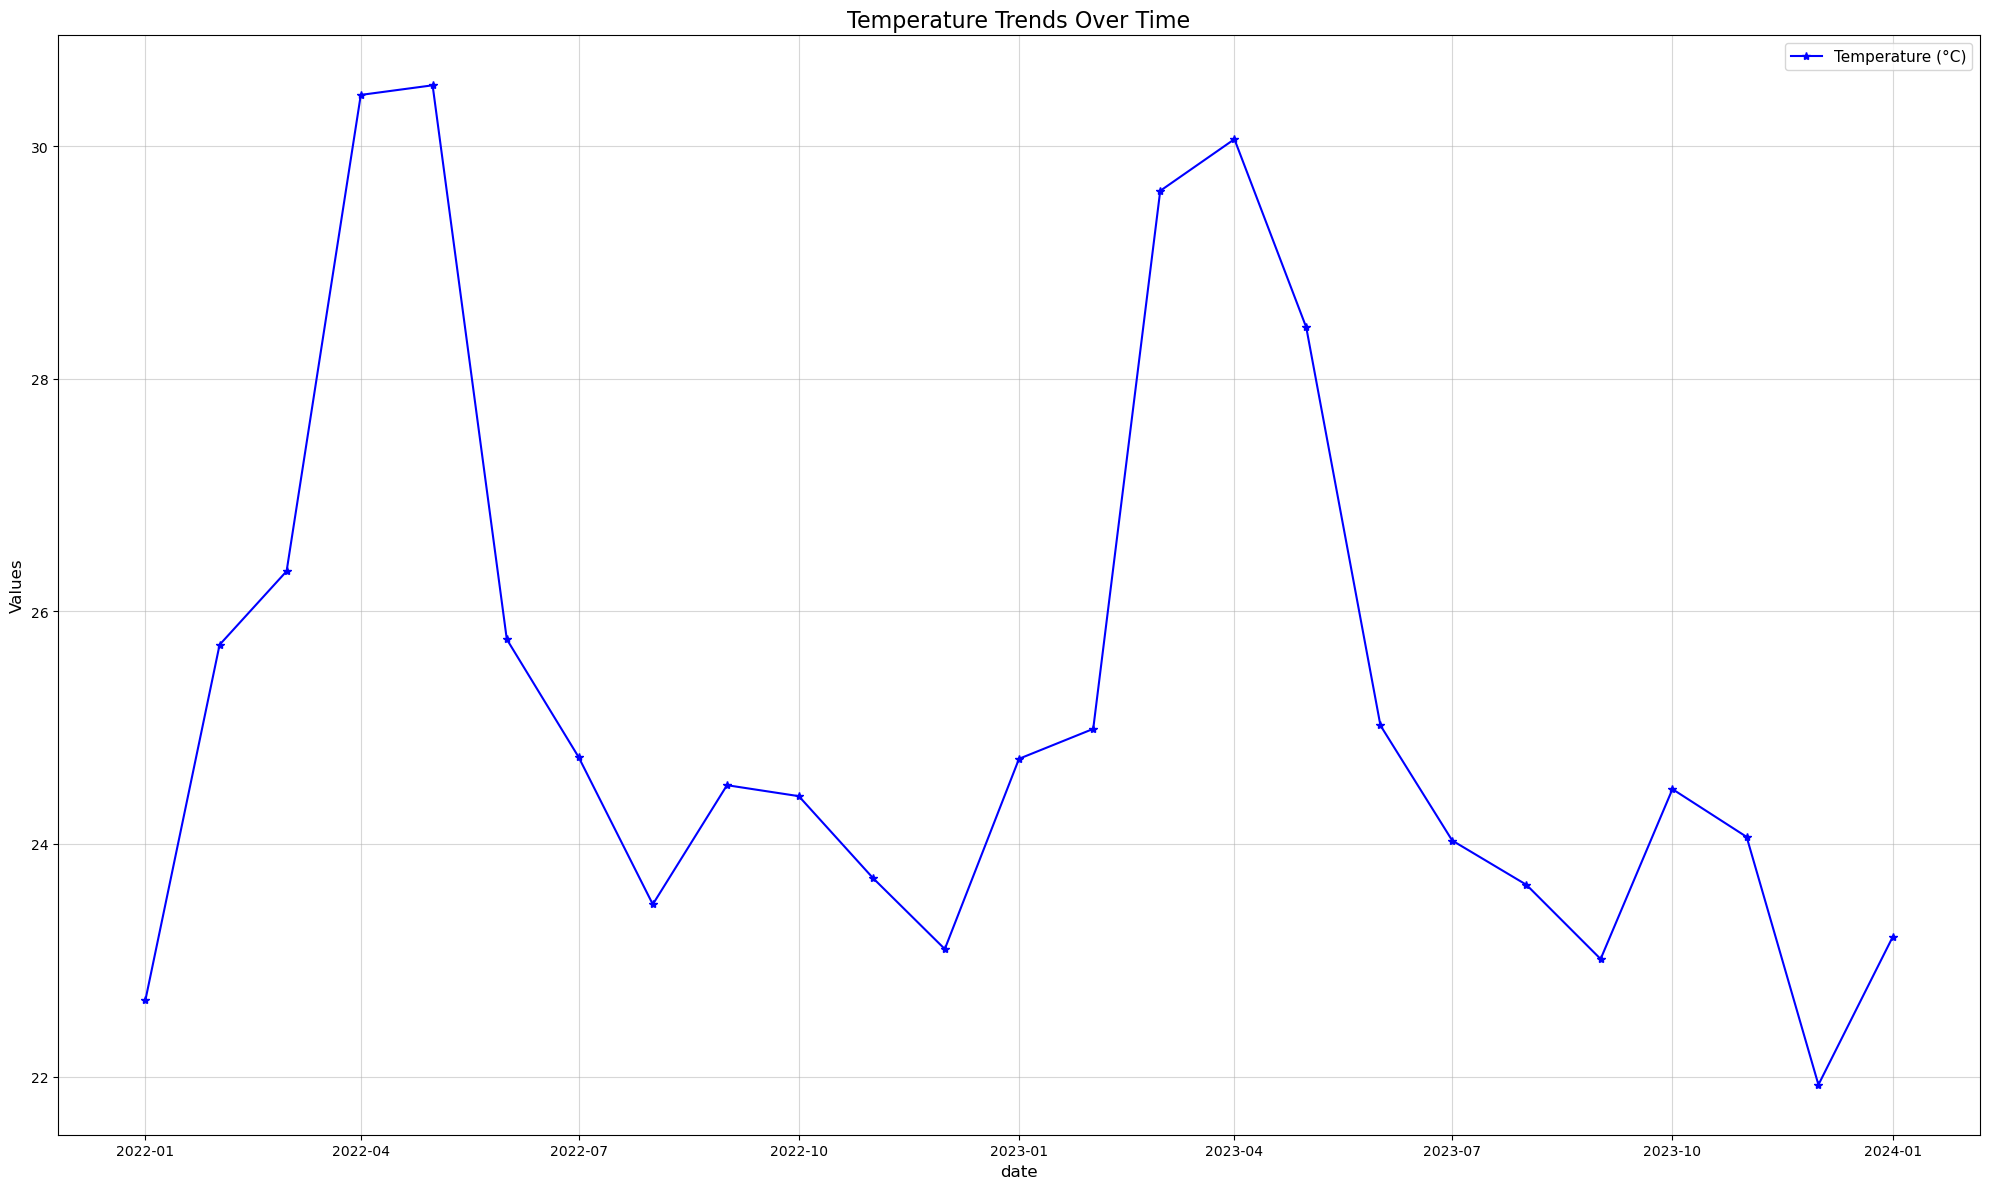

In [10]:
plt.figure(figsize=(20,12))
plt.plot(monthly_aggregated_data['month'], monthly_aggregated_data['Temperature'], marker='*', color='blue', label='Temperature (°C)')
plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

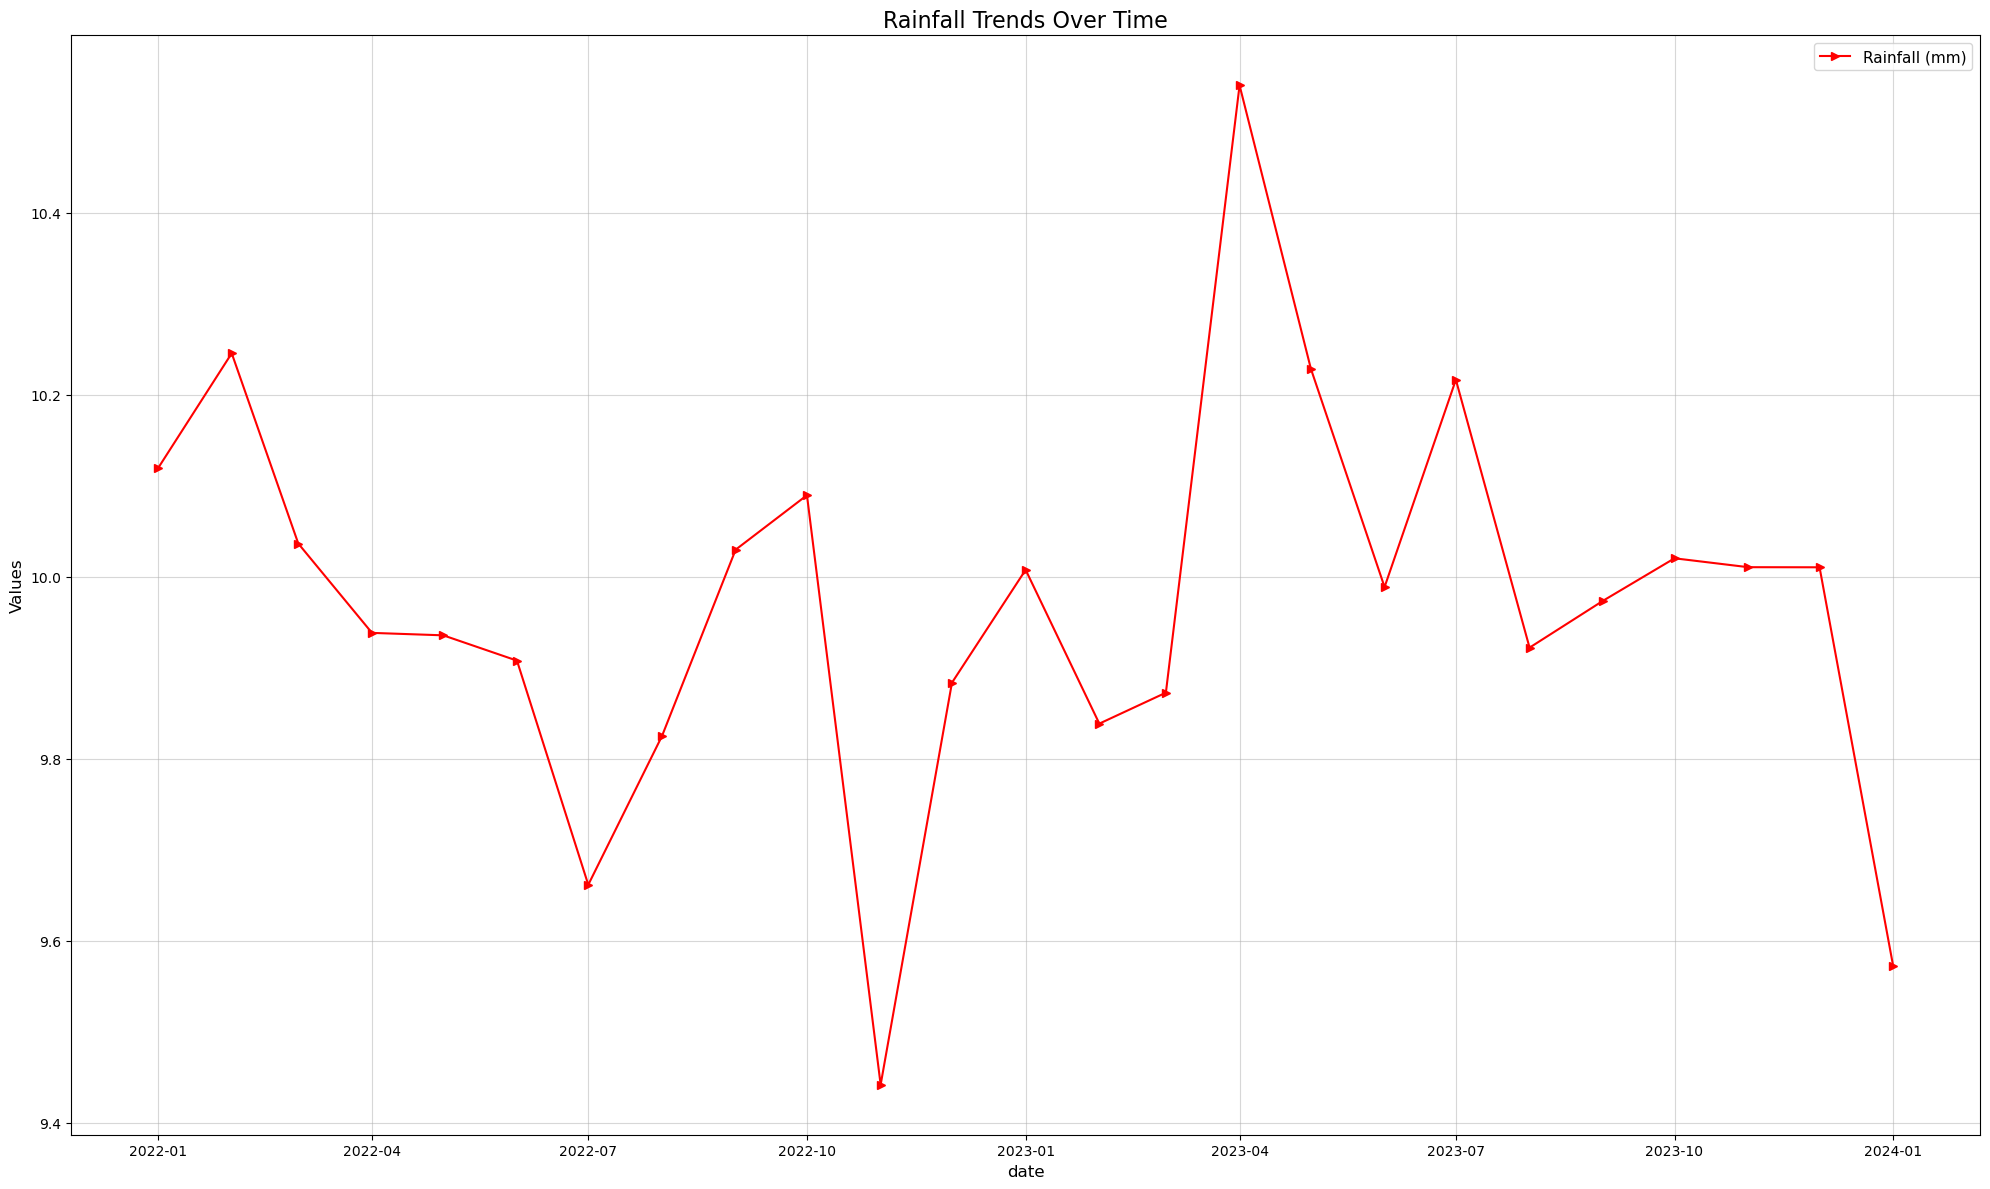

In [12]:
plt.figure(figsize=(20,12))
plt.plot(monthly_aggregated_data['month'], monthly_aggregated_data['Rainfall'], marker='>', color='red', label='Rainfall (mm)')
plt.title('Rainfall Trends Over Time', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10488\98554612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_aggregated_data['month'].dt.month, y=monthly_aggregated_data['Rainfall'], palette="Blues_d")


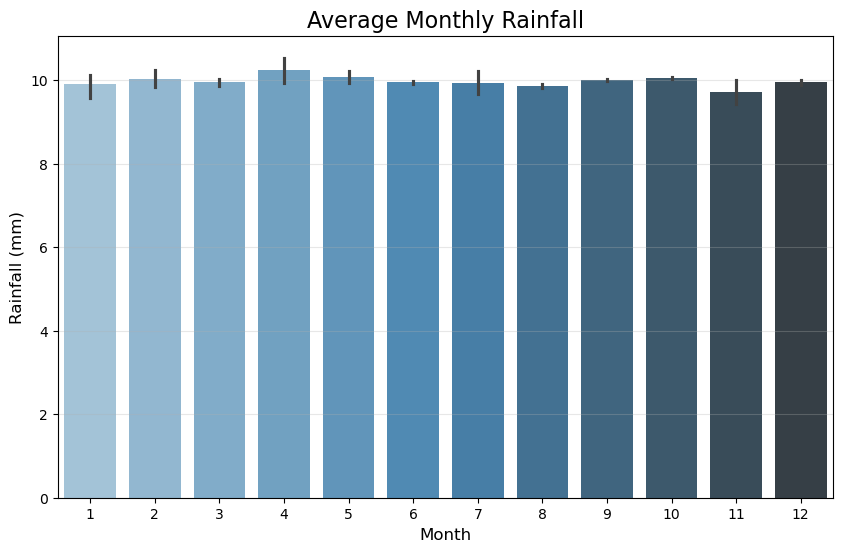

In [14]:

# Bar graph for Rainfall Over Time
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_aggregated_data['month'].dt.month, y=monthly_aggregated_data['Rainfall'], palette="Blues_d")
plt.title('Average Monthly Rainfall', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

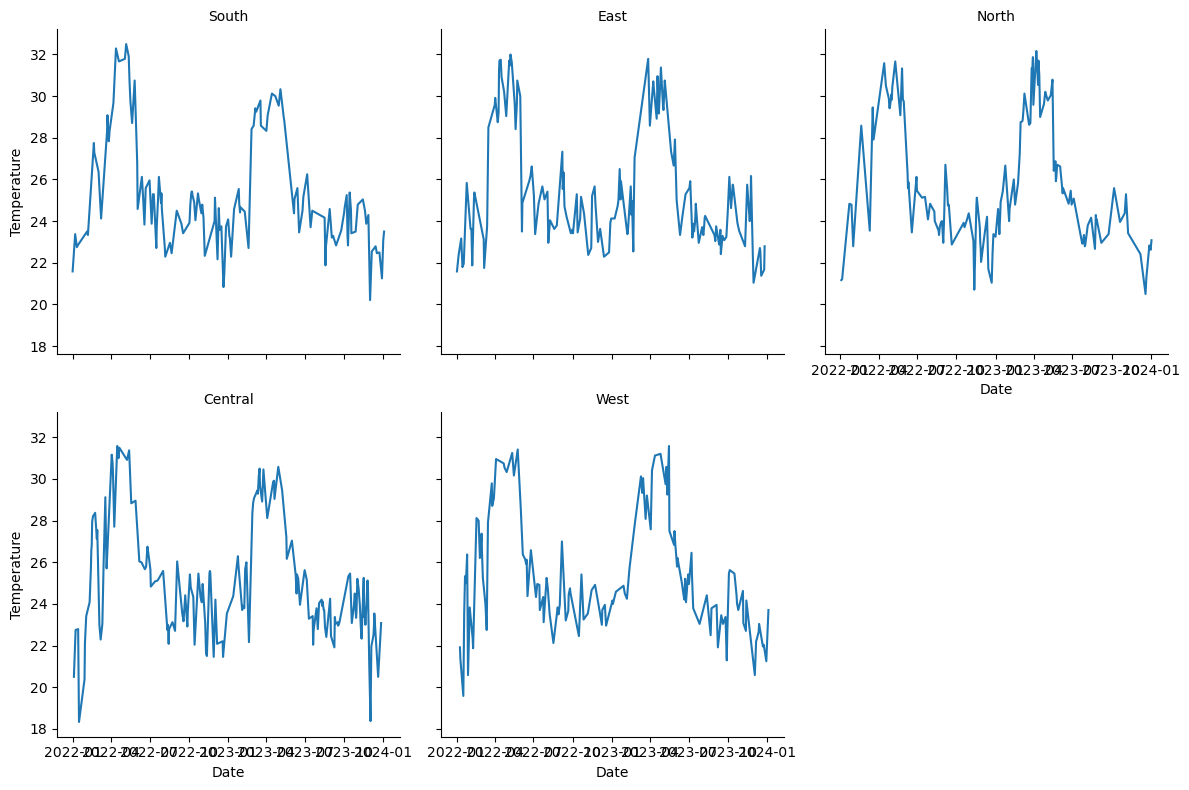

In [16]:
g = sns.FacetGrid(weather_data, col='Region', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'date', 'Temperature')
g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Temperature')
plt.show()

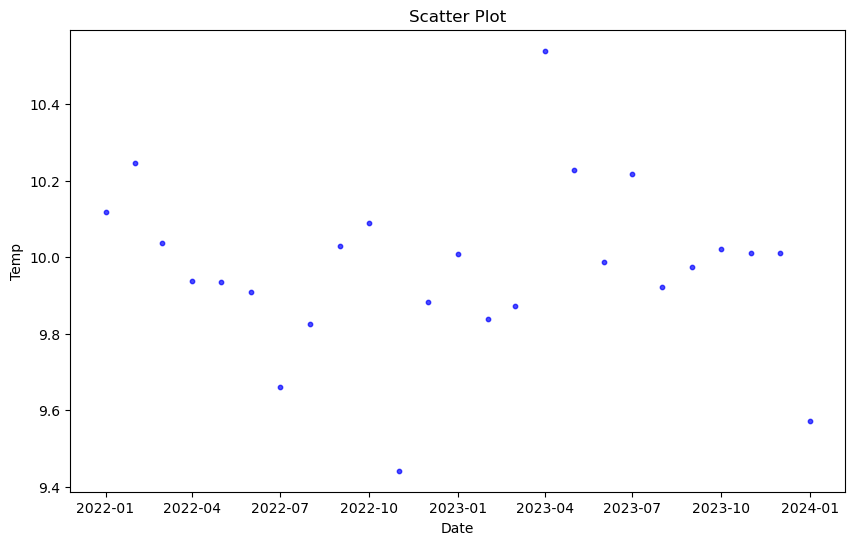

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_aggregated_data['month'], monthly_aggregated_data['Rainfall'],  s=10 ,alpha=0.7, c='blue')  # Replace 'x_column' and 'y_column'
plt.xlabel('Date')  # Replace with your column name or label
plt.ylabel('Temp')  # Replace with your column name or label
plt.title('Scatter Plot')
plt.show()

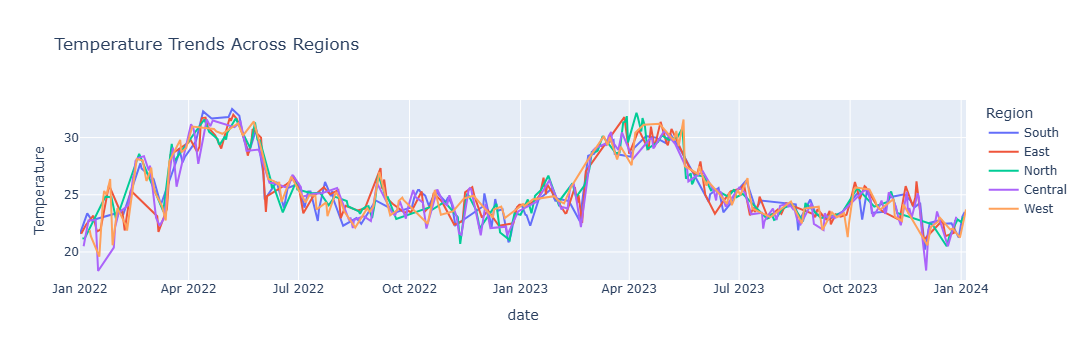

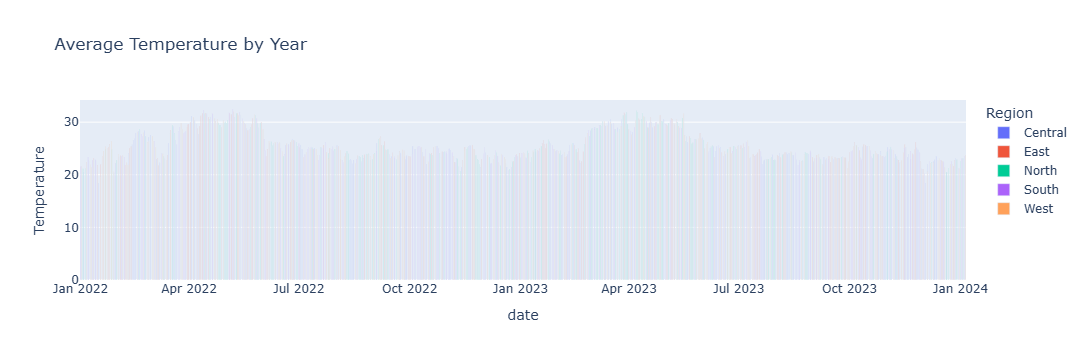

In [34]:

#grouped_data = cleaned_data.groupby(['Region', 'date'])['Temperature'].mean().reset_index()

#print(cleaned_data)
import plotly.express as px

# Interactive line plot
fig = px.line(weather_data, x='date', y='Temperature', color='Region', title='Temperature Trends Across Regions')
fig.show()

# Interactive grouped bar chart
fig = px.bar(grouped_data, x='date', y='Temperature', color='Region', barmode='group', title='Average Temperature by Year')
fig.show()


In [36]:
# Define thresholds
heatwave_threshold = 20  # Example: Temperature > 40°C
heavy_rainfall_threshold = 12  # Example: Rainfall > 50 mm/day
weather_data = pd.read_csv('C:/Users/admin/neuai/Project_01/pune_weather_with_regions.csv')
# Convert 'date' column to datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%m-%Y')

# Add a 'month' column for grouping
weather_data['month'] = weather_data['date'].dt.to_period('M')

# Add extreme event columns
weather_data['heatwave'] = weather_data['Temperature'] > heatwave_threshold
weather_data['heavy_rainfall'] = weather_data['Rainfall'] > heavy_rainfall_threshold


In [38]:
# Identify consecutive heatwave days
weather_data['heatwave_streak'] = weather_data['heatwave'].astype(int).groupby(weather_data['Region']).cumsum()

# Filter for events lasting more than 3 days
heatwave_events = weather_data[weather_data['heatwave_streak'] >= 3]
print(heatwave_events)


          date  Temperature   Humidity   Rainfall   Region    month  heatwave  \
10  2022-01-11    22.750000  51.083333  11.309362    South  2022-01      True   
11  2022-01-12    23.166667  51.833333  11.233322     East  2022-01      True   
12  2022-01-13    22.833333  61.583333  11.387355    South  2022-01      True   
13  2022-01-14    22.791667  65.166667  10.125745  Central  2022-01      True   
14  2022-01-15    21.791667  64.041667   9.051436     East  2022-01      True   
..         ...          ...        ...        ...      ...      ...       ...   
730 2024-01-01    22.625000  48.416667  10.877698    North  2024-01      True   
731 2024-01-02    23.083333  45.375000   7.290903    South  2024-01      True   
732 2024-01-03    23.083333  46.708333  10.949645    North  2024-01      True   
733 2024-01-04    23.500000  47.250000   8.889198    South  2024-01      True   
734 2024-01-05    23.708333  45.833333   9.850423     West  2024-01      True   

     heavy_rainfall  heatwa

In [40]:
# Count events by region
event_counts = weather_data.groupby('Region')[['heatwave', 'heavy_rainfall']].sum()
print(event_counts)

# Average intensity
average_intensity = weather_data.groupby('Region')[['Temperature', 'Rainfall']].mean()
print(average_intensity)


         heatwave  heavy_rainfall
Region                           
Central       163               8
East          157               6
North         138               8
South         138               3
West          136               6
         Temperature   Rainfall
Region                         
Central    25.001263   9.930579
East       25.477442   9.917179
North      25.877717  10.175418
South      25.271437  10.027670
West       25.291667   9.900031


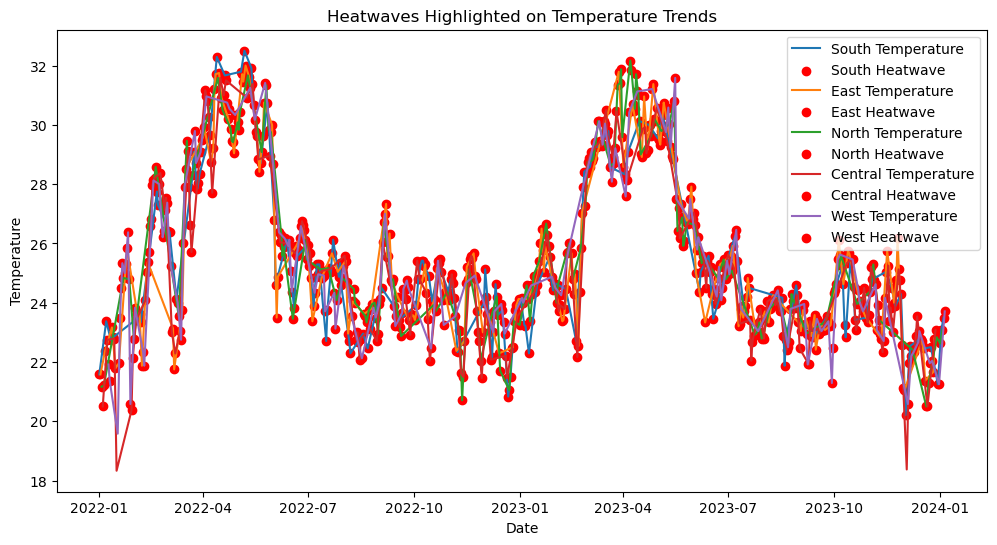

In [42]:
plt.figure(figsize=(12, 6))
for region in weather_data['Region'].unique():
    region_data = weather_data[weather_data['Region'] == region]
    plt.plot(region_data['date'], region_data['Temperature'], label=f'{region} Temperature')
    heatwave_days = region_data[region_data['heatwave']]
    plt.scatter(heatwave_days['date'], heatwave_days['Temperature'], color='red', label=f'{region} Heatwave')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Heatwaves Highlighted on Temperature Trends')
plt.legend()
plt.show()

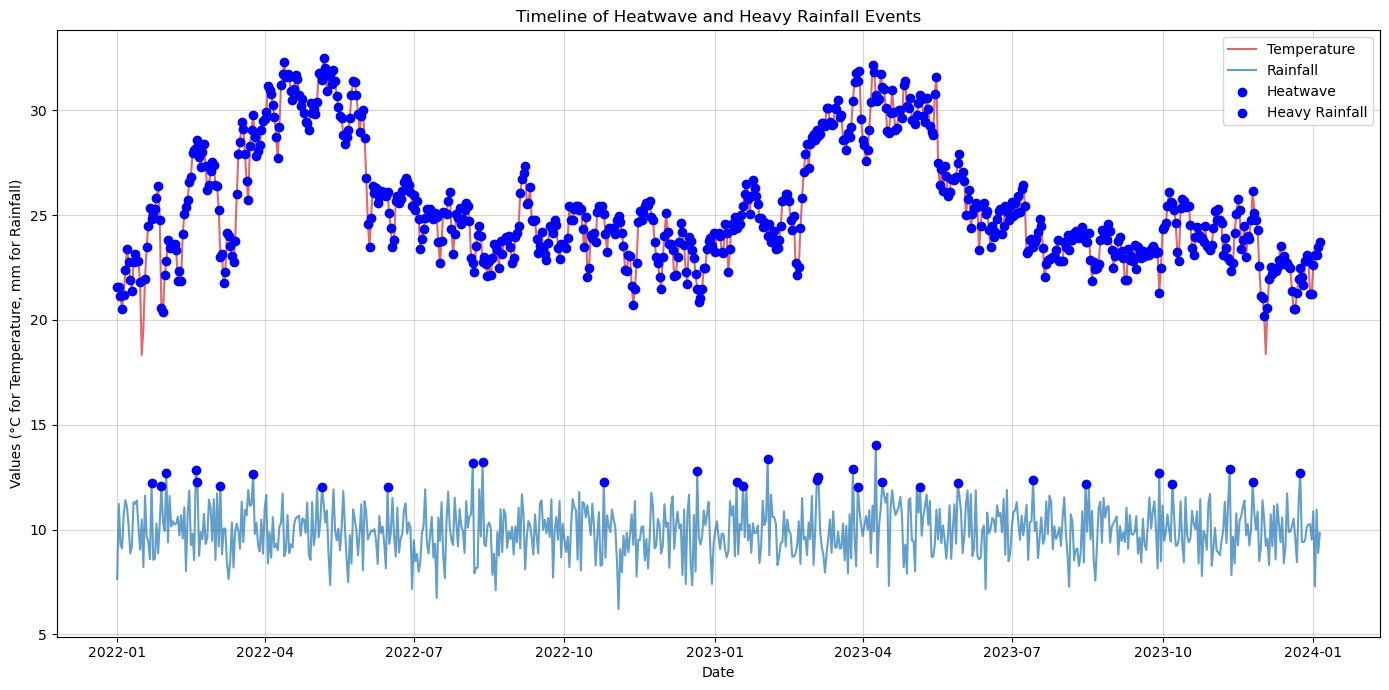

In [44]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format (if not already done)
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Plot the temperature and rainfall over time
plt.figure(figsize=(14, 7))

# Temperature line plot
plt.plot(weather_data['date'], weather_data['Temperature'], label='Temperature', color='tab:red', alpha=0.7)

# Rainfall line plot
plt.plot(weather_data['date'], weather_data['Rainfall'], label='Rainfall', color='tab:blue', alpha=0.7)

# Highlight heatwave events
heatwave_dates = weather_data[weather_data['heatwave']]['date']
heatwave_values = weather_data[weather_data['heatwave']]['Temperature']
plt.scatter(heatwave_dates, heatwave_values, color='blue', label='Heatwave', zorder=5)

# Highlight heavy rainfall events
rainfall_dates = weather_data[weather_data['heavy_rainfall']]['date']
rainfall_values = weather_data[weather_data['heavy_rainfall']]['Rainfall']
plt.scatter(rainfall_dates, rainfall_values, color='blue', label='Heavy Rainfall', zorder=5)

# Add labels, title, and legend
plt.title('Timeline of Heatwave and Heavy Rainfall Events')
plt.xlabel('Date')
plt.ylabel('Values (°C for Temperature, mm for Rainfall)')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()
